# **5. Estadística Inferencial**

# **I. Gestión de directorios y archivos en la nube**

La gestión de archivos y directorios en Google Drive es el proceso de organizar, proteger y compartir información digital en la nube, aprovechando sus funciones de colaboración en tiempo real, control de versiones, permisos de acceso y sincronización multiplataforma, lo que facilita el trabajo individual y grupal de manera eficiente.

## 1.1. Montar Google drive a Colaboratory




Montar Google Drive en Colab es el proceso mediante el cual el entorno de ejecución de Colab obtiene acceso autorizado a los archivos de Google Drive, de forma que se pueden leer, escribir y modificar archivos durante la sesión.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'imp'

## 1.2. Explorar contenido de Google Drive

Explorar contenido de Google Drive se refiere a la acción de navegar, buscar, visualizar y gestionar los archivos y carpetas almacenados en Google Drive, la plataforma de almacenamiento en la nube de Google.



In [2]:
def listar_carpeta(ruta_carpeta):
  import os
  ruta_drive ="/content/drive/MyDrive/"
  contenido_carpeta = os.listdir(ruta_drive + ruta_carpeta)
  n_elem = len(contenido_carpeta)

  print(f"Ruta: {ruta_drive + ruta_carpeta}")
  print(f"Numero de elementos: {n_elem}")

  for i in range(n_elem):
    print(f"({i}) {contenido_carpeta[i]}")

La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos`**

In [3]:
listar_carpeta("Base_datos")

Ruta: /content/drive/MyDrive/Base_datos
Numero de elementos: 4
(0) fuente_de_datos.gdoc
(1) shapes
(2) biomedicina
(3) meteorologia


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/biomedicina`**

In [4]:
listar_carpeta("Base_datos/biomedicina")

Ruta: /content/drive/MyDrive/Base_datos/biomedicina
Numero de elementos: 12
(0) datos_abiertos_vigilancia_dengue_2000_2023.csv
(1) datos_abiertos_vigilancia_malaria_2000_2008.csv
(2) datos_abiertos_vigilancia_malaria_2009_2023.csv
(3) Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Diabetes_202001_202404.csv
(4) datos_abiertos_vigilancia_zoonosis_2000_2023.csv
(5) datos_abiertos_vigilancia_iras_2000_2023.csv
(6) datos_abiertos_vigilancia_enfermedad_carrion_2000_2023.csv
(7) pmGenoma_25Septiembre2021.csv
(8) pmGenoma_27Sep2023.csv
(9) TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv
(10) primeras_100_filas_anemia.xlsx
(11) primeras_100_filas_anemia.gsheet


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/meteorologia`**

In [5]:
listar_carpeta("Base_datos/meteorologia")

Ruta: /content/drive/MyDrive/Base_datos/meteorologia
Numero de elementos: 1
(0) data_estacion_madrid.xlsx


# **II. Importar base de datos**

## 2.1. Preparar entorno

In [6]:
# Paquete especializado en metodos numericos
import numpy as np

# Paquete especialozado manejo de estructuras de datos tipo tablas (Data Frames)
import pandas as pd

# Paquetes especializado para generar graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Paquete especializados de estadística y metodos numéricos
from scipy import stats

# Paquete especializado en estadística
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2.2. Archivos en formato EXCEL



Las mediciones de temperatura del aire, humedad relativa y radiación solar (variables ambientales), realizadas por una estación meteorológica en un punto geográfico específico son datos **cuantitativos contínuos**.

In [7]:
excel_data_file = "/content/drive/MyDrive//Base_datos/meteorologia/data_estacion_madrid.xlsx"

In [8]:
# immportando el archivo Excel
df_excel = pd.read_excel(excel_data_file)
print(df_excel)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar
0             0 2021-01-01   3.625000  73.583333   99.833333
1             1 2021-01-02   1.329167  60.625000   74.333333
2             2 2021-01-03   1.920833  63.958333  101.500000
3             3 2021-01-04   3.433333  57.791667  101.958333
4             4 2021-01-05   0.445833  69.541667  106.666667
..          ...        ...        ...        ...         ...
329         329 2021-11-26   5.562500  69.875000   87.833333
330         330 2021-11-27   5.500000  61.500000   93.041667
331         331 2021-11-28   4.783333  60.291667  117.750000
332         332 2021-11-29  10.112500  61.541667  108.750000
333         333 2021-11-30   6.691667  74.000000  102.958333

[334 rows x 5 columns]


In [9]:
data_interes = df_excel[[ "rxn_solar", "hr", "temp_aire"]]
print(data_interes)

      rxn_solar         hr  temp_aire
0     99.833333  73.583333   3.625000
1     74.333333  60.625000   1.329167
2    101.500000  63.958333   1.920833
3    101.958333  57.791667   3.433333
4    106.666667  69.541667   0.445833
..          ...        ...        ...
329   87.833333  69.875000   5.562500
330   93.041667  61.500000   5.500000
331  117.750000  60.291667   4.783333
332  108.750000  61.541667  10.112500
333  102.958333  74.000000   6.691667

[334 rows x 3 columns]


## 2.3. Archivos en formato CSV

Importar archivos en formato CSV (Comma-Separated Values, o Valores Separados por Comas) consiste en el proceso de cargar o transferir datos almacenados en un archivo CSV a un programa, aplicación o base de datos para su procesamiento, análisis o almacenamiento. Un archivo CSV es un formato de texto plano que organiza datos en filas y columnas, donde los valores están separados por comas (u otros delimitadores, como punto y coma o tabulaciones) y cada fila representa un registro.

In [10]:
csv_data_file = "/content/drive/My Drive/Base_datos/biomedicina/TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv"

df_csv = pd.read_csv(csv_data_file)
print(df_csv)

       Sexo  id_persona  Edad Tipo_edad  id_ubigeo  Fecha_atencion    Etapa  \
0         F    41031388    20         A        NaN        20230208  18a-29a   
1         F    40489600     2         A     1128.0        20230107  00a-11a   
2         M    40315865     1         A        NaN        20230207  00a-11a   
3         F    38917347    19         D     1460.0        20210511  00a-11a   
4         M    40507941     3         A     1668.0        20230224  00a-11a   
...     ...         ...   ...       ...        ...             ...      ...   
248888    M     9206744     6         A     1631.0        20230119  00a-11a   
248889    M    25824229     4         A      163.0        20210528  00a-11a   
248890    F    19472530     6         A     1161.0        20230107  00a-11a   
248891    F    33840534     4         A      242.0        20210412  00a-11a   
248892    F    19486739    84         A     1703.0        20230525     60a+   

        Diagnostico Tipo_Dx  Lab  id_eess  
0      

# **III. Supuestos para implementar un modelo de regresión lineal simple**

El modelo de regresión lineal simple (RLS) busca modelar la relación lineal entre una variable independiente (X) y una variable dependiente (Y) mediante la ecuación  {eq}`eq:regresionLinealSimple`

$$ Y = \beta_1 X +\beta_0+ \epsilon $$(eq:regresionLinealSimple)

Donde:

$Y$ es el valor observado de la variable dependiente.
$\beta_1 X + \beta_0$ es el valor predicho de la variable dependiente por el modelo ($\hat{Y}$).
Reorganizando la ecuación para aislar el error residual ($\epsilon$), obtenemos su relación matemática:

$ \epsilon = Y - (\beta_1 X + \beta_0) $

O, utilizando la notación de valor predicho:

$ \epsilon = Y - \hat{Y} $

En esencia, el residuo es cuánto se "equivoca" el modelo para una observación particular. Un residuo positivo significa que el modelo subestimó el valor observado, mientras que un residuo negativo significa que el modelo lo sobreestimó.

Para que este modelo sea válido y sus inferencias confiables (especialmente cuando se usa el método de mínimos cuadrados ordinarios, OLS), los datos deben cumplir ciertos supuestos y requisitos. Estos se derivan de la teoría estadística y ayudan a garantizar que los estimadores sean insesgados, consistentes y eficientes.

In [11]:
# Definir conjunto de datos

tiempo = df_excel["fecha"]
temp_prom = df_excel["temp_aire"]
hr = df_excel["hr"]
rxn = df_excel["rxn_solar"]

## 3.1. Linealidad


**Descripción:**

La relación entre la variable independiente ($X$) y dependiente ($Y$) debe ser lineal.

**Implicación de Incumplimiento:**

El modelo lineal no capturará correctamente la verdadera relación, resultando en predicciones poco fiables.


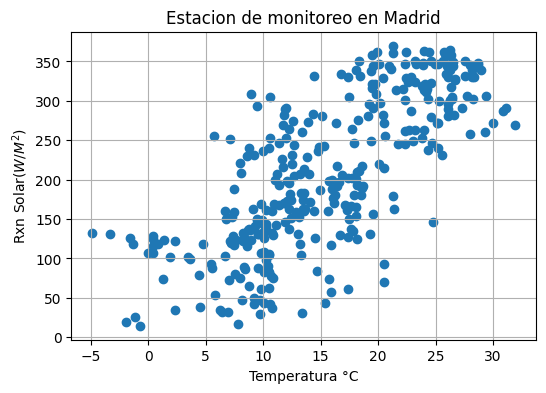

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

axes.scatter(temp_prom, rxn)
axes.set_xlabel("Temperatura °C")
axes.set_ylabel(r"Rxn Solar$(W/M^{2})$")
axes.set_title("Estacion de monitoreo en Madrid")
axes.grid(True)
plt.show()

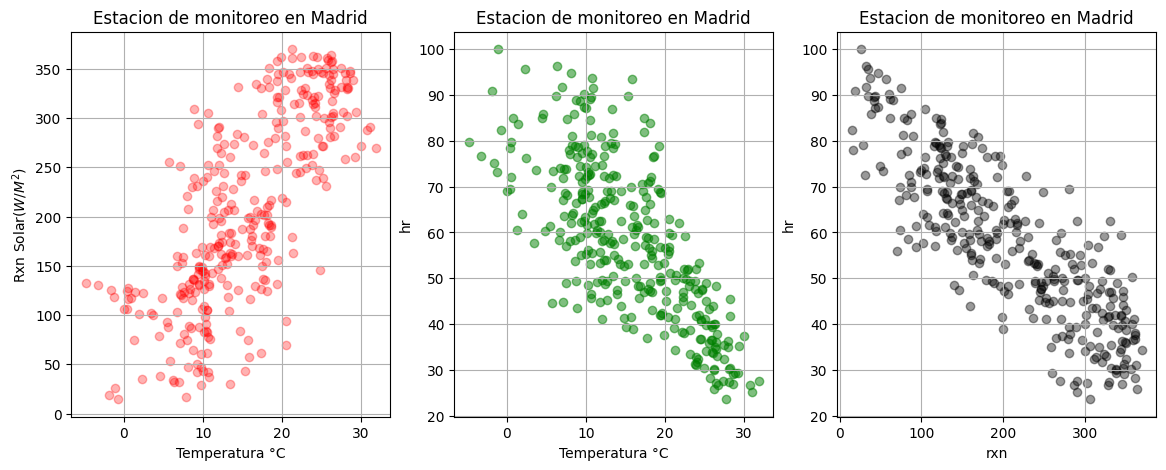

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
fig.subplots_adjust(hspace=0.06)

ax[0].scatter(temp_prom, rxn, c="r", alpha=0.3)
ax[0].set_xlabel("Temperatura °C")
ax[0].set_ylabel(r"Rxn Solar$(W/M^{2})$")
ax[0].set_title("Estacion de monitoreo en Madrid")
ax[0].grid(True)

ax[1].scatter(temp_prom, hr, c="green", alpha=0.5)
ax[1].set_xlabel("Temperatura °C")
ax[1].set_ylabel(r"hr")
ax[1].set_title("Estacion de monitoreo en Madrid")
ax[1].grid(True)

ax[2].scatter(rxn, hr, c="black", alpha=0.4)
ax[2].set_xlabel(r"rxn")
ax[2].set_ylabel("hr")
ax[2].set_title("Estacion de monitoreo en Madrid")
ax[2].grid(True)

## 3.2. Independencia de las observaciones

 **Descripción:**

 Los errores (residuos) deben ser independientes entre sí, es decir, no debe haber correlación entre ellos.

 **Implicación de Incumplimento:**

 Si hay autocorrelación (común en series de tiempo), la precisión de los coeficientes y las pruebas de hipótesis se ve afectada.


In [36]:
def pruebaHipotesis_durbinWatson(resultado):
  # Calculate the Durbin-Watson statistic
  durbin_watson_statistic = sm.stats.durbin_watson(resultado.resid)

  print(f"Estadístico Durbin-Watson: {durbin_watson_statistic}")

  if durbin_watson_statistic < 1.5:
    print("Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.")
  elif durbin_watson_statistic > 2.5:
    print("Estadístico Durbin-Watson statistic mayor que 2.5: autocorrelación negativa.")
  else:
    print("Estadístico Durbin-Watson entre 1.5 y 2.5: autocorrelación no significativa.")

In [38]:
# Fit a simple linear regression model
modelo_rxn_temp = smf.ols('rxn ~ temp_prom', data=df_excel).fit()

In [39]:
pruebaHipotesis_durbinWatson(modelo_rxn_temp)

Estadístico Durbin-Watson: 0.8018175807839815
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


In [31]:
# Fit a simple linear regression model for hr vs rxn
model_hr_rxn = smf.ols('hr ~ rxn', data=df_excel).fit()

In [40]:
pruebaHipotesis_durbinWatson(model_hr_rxn)

Estadístico Durbin-Watson: 0.8993755341695832
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


In [41]:
# Fit a simple linear regression model for hr vs temp_prom
model_hr_temp = smf.ols('hr ~ temp_prom', data=df_excel).fit()

In [42]:
pruebaHipotesis_durbinWatson(model_hr_temp)

Estadístico Durbin-Watson: 0.590678731081639
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


## 3.3. Homocedasticidad

**Descripción:**

La varianza de los errores (residuos) debe ser constante para todos los valores de la variable independiente ($X$).

**Implicación de Incumplimiento:**

La varianza de los errores cambia (heterocedasticidad), lo que puede distorsionar los intervalos de confianza y las pruebas de hipótesis.

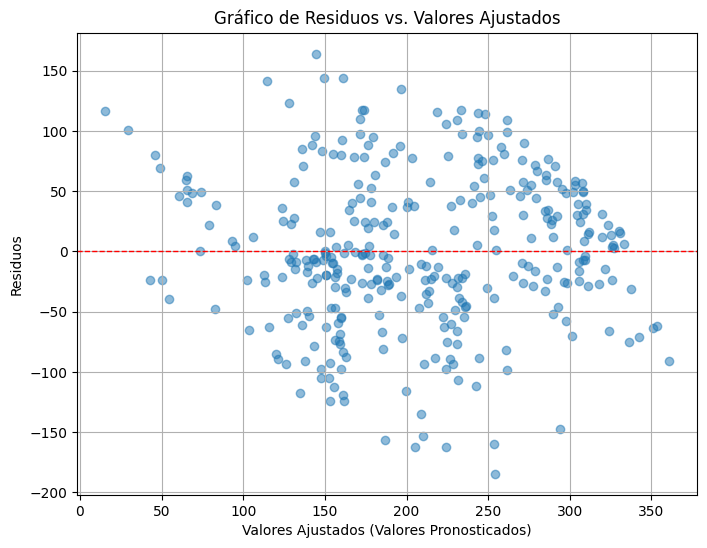

In [46]:
# Obtener residuos y valores ajustados del modelo
residuos = modelo_rxn_temp.resid
valores_ajustado = modelo_rxn_temp.fittedvalues

# Crear un diagrama de dispersión de residuos frente a valores ajustados
plt.figure(figsize=(8, 6))
plt.scatter(valores_ajustado, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Valores Ajustados (Valores Pronosticados)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados")
plt.grid(True)
plt.show()

##  3.4. Normalidad de los residuos

**Descripción:**

Los errores (residuos) deben seguir una distribución normal (o Gaussiana) con media cero.

**Implicación de Incumplimiento:**

Importante para la inferencia estadística (pruebas t, intervalos de confianza). Menos crítico para la predicción si el tamaño de la muestra es grande.

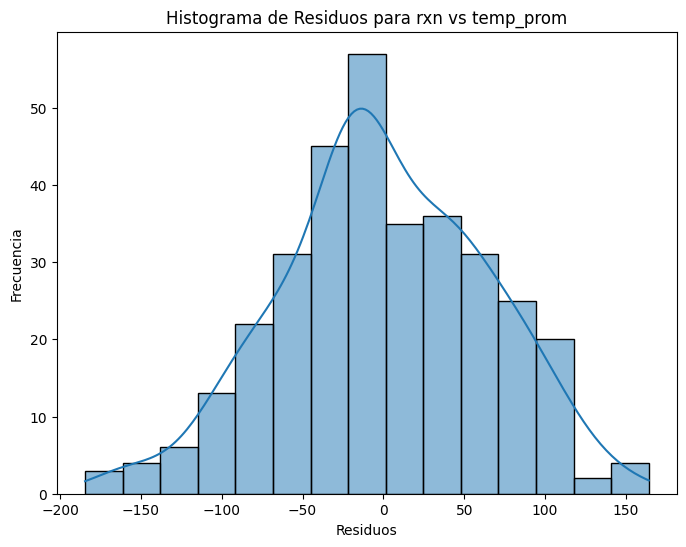

In [48]:
# Create a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(modelo_rxn_temp.resid, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos para rxn vs temp_prom")
plt.show()

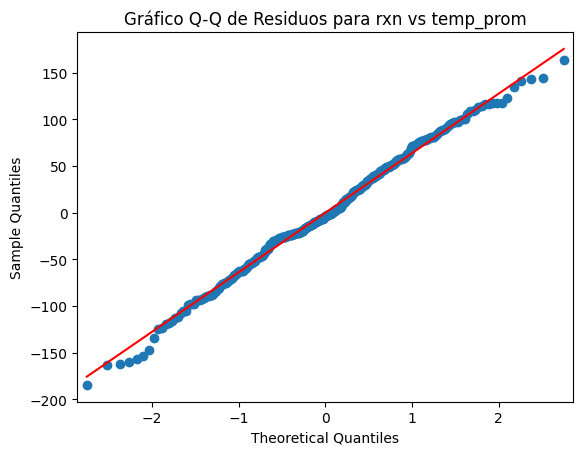

In [49]:
# Create a Q-Q plot of the residuals
sm.qqplot(modelo_rxn_temp.resid, line='s')
plt.title("Gráfico Q-Q de Residuos para rxn vs temp_prom")
plt.show()

## 3.5. Ausencia de valores atípicos

Realizar graficas de diagrama de cajas usando las otras variables (humedad relativa y radiación solar)

Los outliers pueden afectar significativamente el modelo

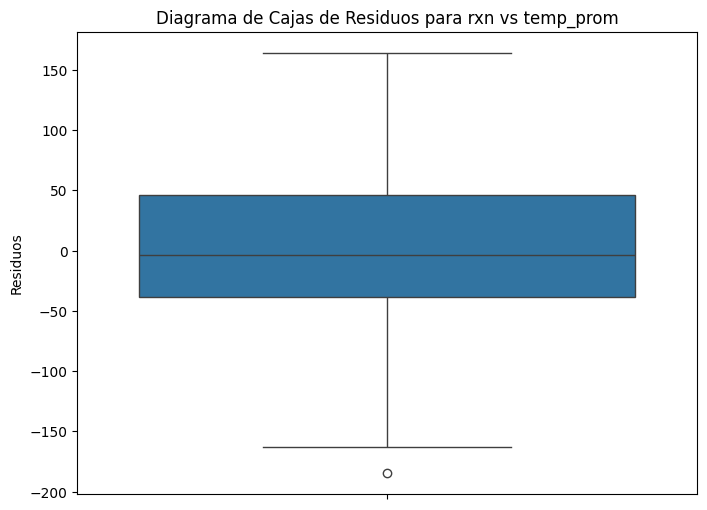

In [50]:
# Create a box plot of the residuals
plt.figure(figsize=(8, 6))
sns.boxplot(y=modelo_rxn_temp.resid)
plt.ylabel("Residuos")
plt.title("Diagrama de Cajas de Residuos para rxn vs temp_prom")
plt.show()